# 有机C和全N 

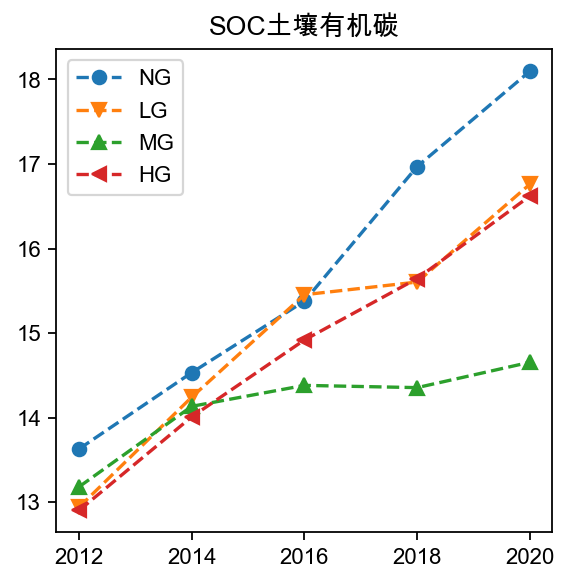

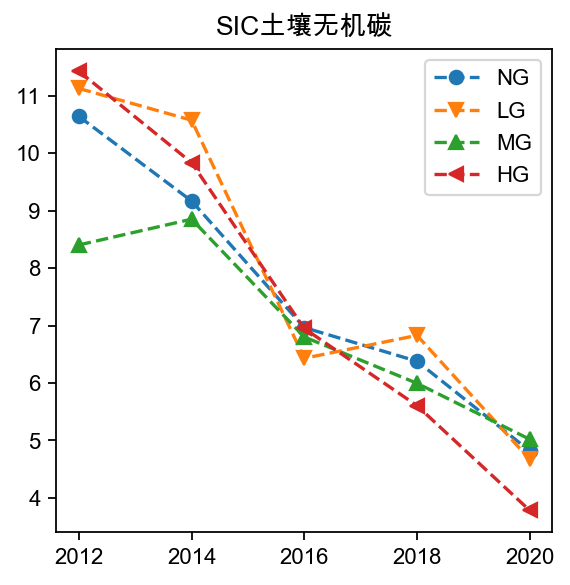

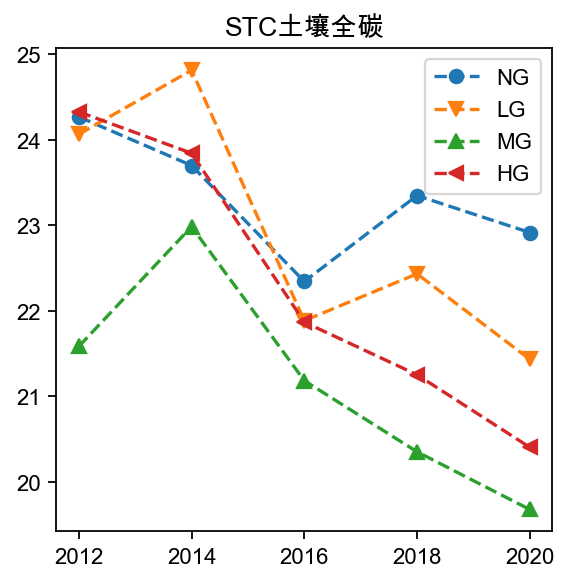

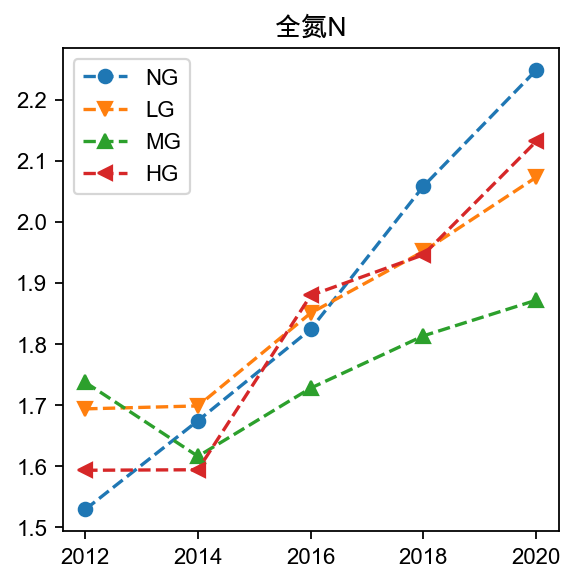

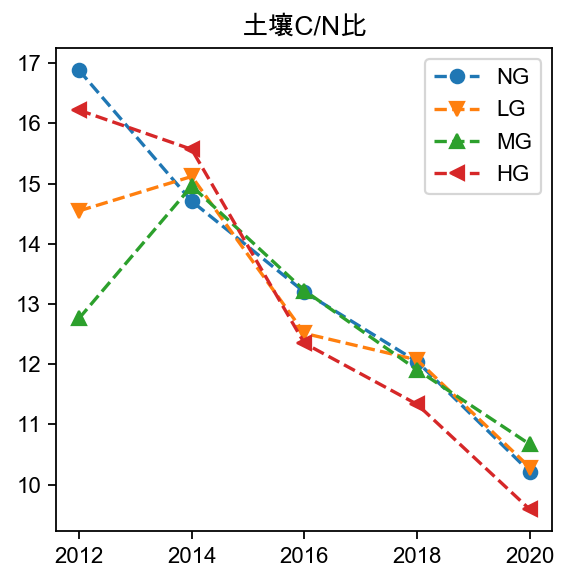

In [21]:
from cProfile import label
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['Arial Unicode MS']

data = pd.read_excel(io='./附件14/内蒙古自治区锡林郭勒盟典型草原不同放牧强度土壤碳氮监测数据集（2012年8月15日-2020年8月15日）.xlsx')

index = ['SOC土壤有机碳','SIC土壤无机碳','STC土壤全碳','全氮N','土壤C/N比']
#== 计算年平均值, 返回时间，化学成分，放牧强度
def Ave_year(plot):
    data2012 =  plot[plot['year'] == 2012]
    data2014 =  plot[plot['year'] == 2014]
    data2016 =  plot[plot['year'] == 2016]
    data2018 =  plot[plot['year'] == 2018]
    data2020 =  plot[plot['year'] == 2020]

    years = [data2012,data2014,data2016,data2018,data2020]
    t = [2012,2014,2016,2018,2020]
    intens = list(plot['放牧强度（intensity）'])[0]

    ave_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[],'土壤C/N比':[]}
    for year in years:
        for id in ave_data.keys():
            ave_data[id].append(sum(year[id])/len(year)) #平均
    return t,ave_data,intens
            

plot = ['G6','G8','G9','G11','G12','G13','G16','G17','G18','G19','G20','G21']



# 计算地区平均


def Ave_area():

    Intens_dat = {'NG':[],'LGI':[],'MGI':[],'HGI':[]}

    NG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    LG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    MG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    HG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}

    # 按 intense 分类
    for ins in Intens_dat.keys():
        for pl in plot:
            temp_data = data[data['放牧小区（plot）']==pl]
            t,ave,intens = Ave_year(temp_data)
            if intens == ins:
                Intens_dat[ins].append(ave.copy())

    # 求平均
    for key in NG_data.keys():
        NG_data[key] = (np.array(Intens_dat['NG'][0][key])+np.array(Intens_dat['NG'][1][key]) + np.array(Intens_dat['NG'][2][key]))/3
    for key in LG_data.keys():
        LG_data[key] = (np.array(Intens_dat['LGI'][0][key])+np.array(Intens_dat['LGI'][1][key]) + np.array(Intens_dat['LGI'][2][key]))/3
    for key in MG_data.keys():
        MG_data[key] = (np.array(Intens_dat['MGI'][0][key])+np.array(Intens_dat['MGI'][1][key]) + np.array(Intens_dat['MGI'][2][key]))/3
    for key in HG_data.keys():
        HG_data[key] = (np.array(Intens_dat['HGI'][0][key])+np.array(Intens_dat['HGI'][1][key]) + np.array(Intens_dat['HGI'][2][key]))/3

    return NG_data,LG_data,MG_data,HG_data


NG_data,LG_data,MG_data,HG_data = Ave_area()
for id in index:
    t = [2012,2014,2016,2018,2020]
    plt.figure(figsize=(4,4),dpi=160)
    plt.title(id)
    plt.plot(t,NG_data[id],label='NG', linestyle='dashed', marker='o')
    plt.plot(t,LG_data[id],label='LG', linestyle='dashed', marker='v')
    plt.plot(t,MG_data[id],label='MG', linestyle='dashed', marker='^')
    plt.plot(t,HG_data[id],label='HG', linestyle='dashed', marker='<')
    plt.legend()
    id = id.replace('/', 'to')
    plt.savefig(id+'.pdf')


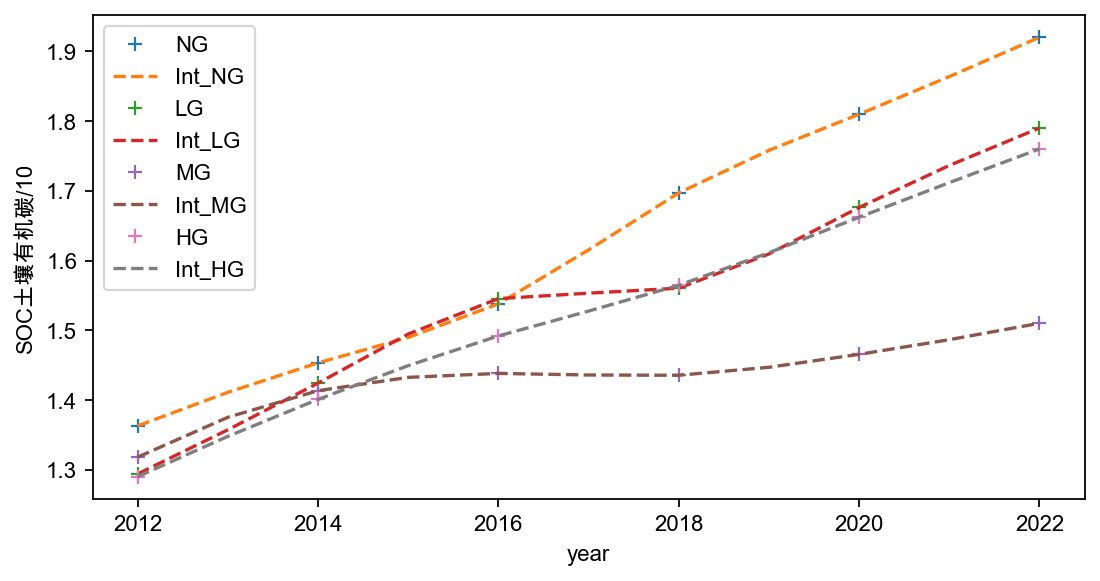

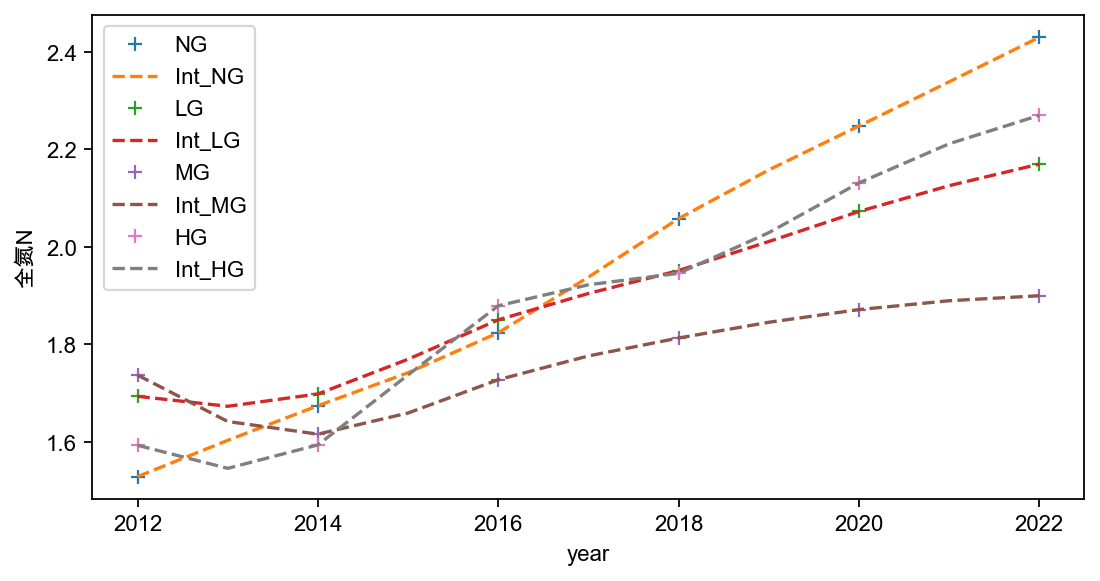

In [555]:

from scipy import interpolate

xnew=np.linspace(0,8,9) 
#  2022 的值 见问题3
SOC_2022 = {'NG':[19.2],'LG':[17.9],'MG':[15.1],'HG':[17.6]}
N_2022 = {'NG':[2.43],'LG':[2.17],'MG':[1.90],'HG':[2.27]}

year_SOC = {'NG':NG_data['SOC土壤有机碳'],'LG':LG_data['SOC土壤有机碳'],'MG':MG_data['SOC土壤有机碳'],'HG':HG_data['SOC土壤有机碳']}
year_N =  {'NG':NG_data['全氮N'],'LG':LG_data['全氮N'],'MG':MG_data['全氮N'],'HG':HG_data['全氮N']}

norn_SOC,norn_N = 10,1
shift_SOC,shift_N = 0,0
for key in year_SOC.keys():
    year_SOC[key] = np.concatenate((year_SOC[key], SOC_2022[key]), axis=0)/norn_SOC
    year_SOC[key] = year_SOC[key] - shift_SOC
for key in year_N.keys():
    year_N[key] = np.concatenate((year_N[key], N_2022[key]), axis=0)/norn_N
    year_N[key] = year_N[key]- shift_N

Int_year_SOC,Int_year_N = {},{}
x=np.linspace(0,10,6)+2012
xnew=np.linspace(0,10,11)+2012

plt.figure(figsize=(8,4),dpi=160)
for key in year_SOC.keys(): 
    y = year_SOC[key]
    f=interpolate.interp1d(x,y,kind=2)
    ynew=f(xnew)
    Int_year_SOC[key]=ynew
    plt.plot(x,y,label=key, linestyle='', marker='+')
    plt.plot(xnew,Int_year_SOC[key],label='Int_'+key, linestyle='dashed')

    Int_year_SOC[key] = Int_year_SOC[key][0:-1]/np.max(Int_year_SOC[key]) #保留前10年数据

plt.xlabel('year')
plt.ylabel('SOC土壤有机碳/10')
plt.legend()
plt.savefig('SOC土壤有机碳_预测.pdf')


plt.figure(figsize=(8,4),dpi=160)
for key in year_N.keys():

    y = year_N[key]
    f=interpolate.interp1d(x,y,kind=2)
    ynew=f(xnew)
    Int_year_N[key]=ynew
    
    plt.plot(x,y,label=key, linestyle='', marker='+')
    plt.plot(xnew,Int_year_N[key],label='Int_'+key, linestyle='dashed')

    Int_year_N[key] = Int_year_N[key][0:-1] #保留前10年数据

plt.xlabel('year')
plt.ylabel('全氮N')
plt.legend()
plt.savefig('全氮N_预测.pdf')

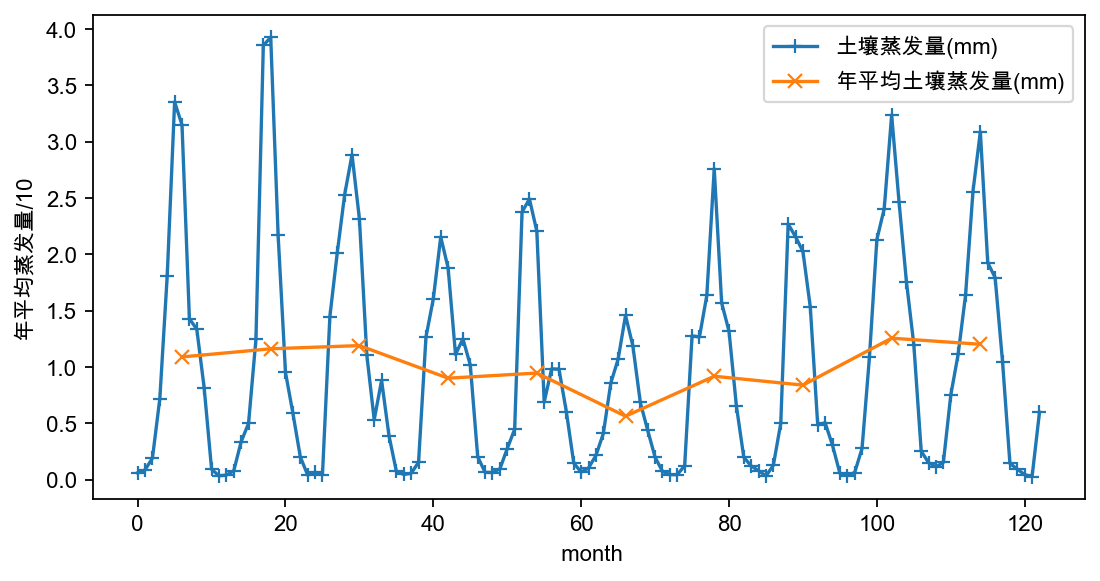

In [556]:
#==== 蒸发量
import pandas as pd
plt.rcParams['font.family'] = ['Arial Unicode MS']

data = pd.read_csv('./第2题_data_simplified.csv')
t = 10
#== 绘制土壤蒸发量
indx = '土壤蒸发量(mm)'
norn_evap = 10

evapo = data[indx]/norn_evap
shif_evap = 0
evapo = evapo - shif_evap

ave_evapo = []
for i  in range(t):
    ave_evapo.append(sum(evapo[i*12:(i+1)*12])/12)
plt.figure(figsize=(8,4),dpi=160)
plt.plot(evapo,label=indx, linestyle='solid', marker='+')
plt.plot((np.array(range(t))+0.5)*12,ave_evapo,label='年平均'+indx, linestyle='solid', marker='x')
plt.legend()
plt.xlabel(' month')
plt.ylabel('年平均蒸发量/10')
plt.savefig('年平均蒸发量.pdf')

ave_evapo = ave_evapo/np.max(ave_evapo)

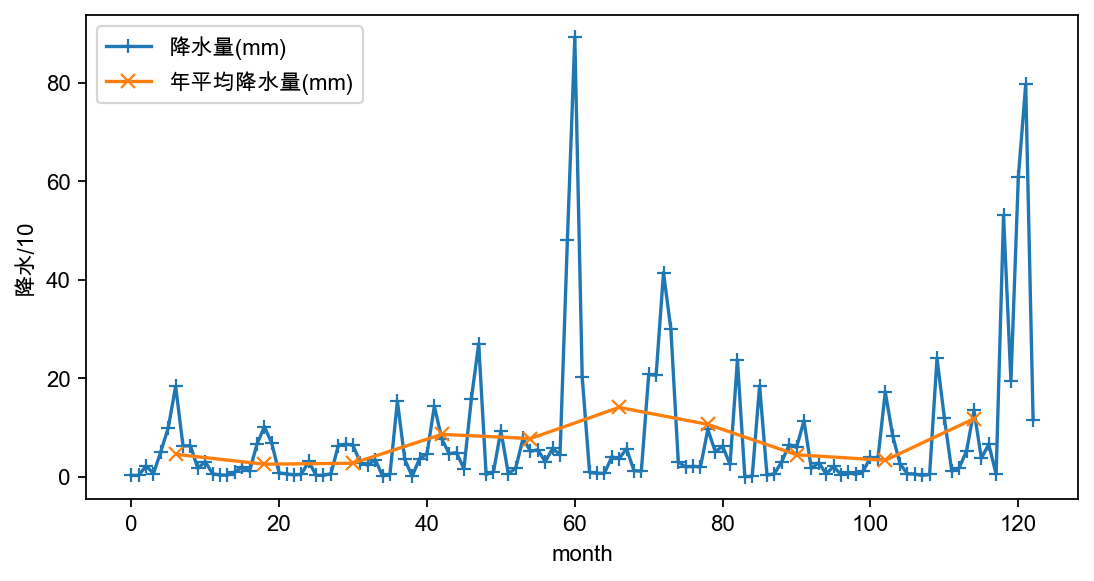

In [557]:
# 年平均 降水量
indx = '降水量(mm)'
norn_rain = 10
rain = data[indx]/norn_rain
shift_rain = 0
rain = rain-shift_rain
ave_rain = []
for i  in range(t):
    ave_rain.append(sum(rain[i*12:(i+1)*12])/12)
plt.figure(figsize=(8,4),dpi=160)
plt.plot(rain,label='降水量(mm)', linestyle='solid', marker='+')
plt.plot((np.array(range(t))+0.5)*12,ave_rain,label='年平均降水量(mm)', linestyle='solid', marker='x')
plt.legend()
plt.xlabel('month')
plt.ylabel('降水/10')
plt.savefig('年平均降水量.pdf')

ave_rain = ave_rain/np.max(ave_rain)

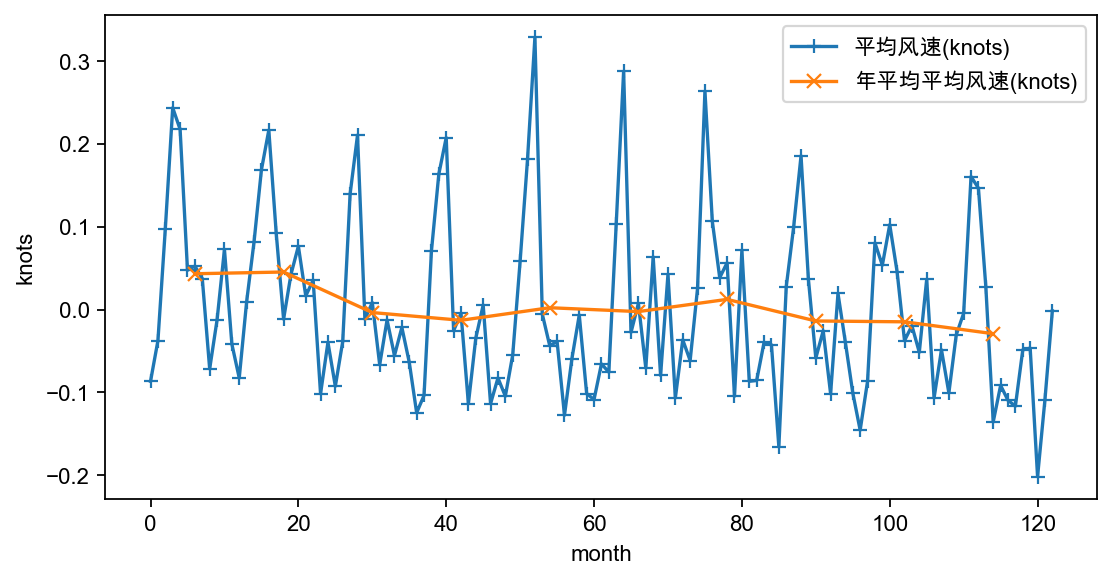

In [551]:
# 年平均 风速

data = pd.read_csv('./第2题_data_all.csv')
indx = '平均风速(knots)'

wind = data[indx]/10
shift_wind = mean(wind)
wind = wind -shift_wind
ave_wind = []
for i  in range(t):
    ave_wind.append(sum(wind[i*12:(i+1)*12])/12)
plt.figure(figsize=(8,4),dpi=160)
plt.plot(wind,label=indx, linestyle='solid', marker='+')
plt.plot((np.array(range(t))+0.5)*12,ave_wind,label='年平均'+indx, linestyle='solid', marker='x')
plt.legend()
plt.xlabel('month')
plt.ylabel('knots/10')
plt.savefig('年平均风速.pdf')

ave_wind = np.array(ave_wind)



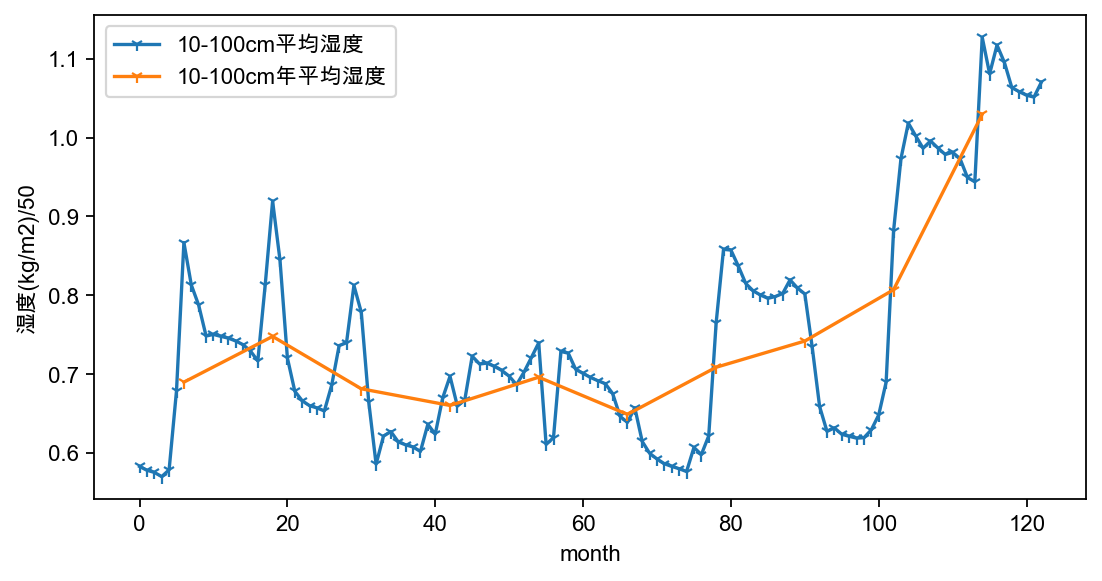

In [558]:
plt.figure(figsize=(8,4),dpi=160)
ave_wet = (data['10cm湿度(kg/m2)'] + data['40cm湿度(kg/m2)'] + data['100cm湿度(kg/m2)'])/3
norn_wet = 50
ave_wet = ave_wet/norn_wet
shift_wet = 0 #mean(ave_wet)
ave_wet = ave_wet -shift_wet
year_wet = []
for i  in range(t):
    year_wet.append(sum(ave_wet[i*12:(i+1)*12])/12)
plt.plot(ave_wet,label='10-100cm平均湿度', linestyle='solid', marker='1')
plt.plot((np.array(range(t))+0.5)*12,year_wet,label='10-100cm年平均湿度', linestyle='solid', marker='1')
plt.xlabel('month')
plt.ylabel('湿度(kg/m2)/50')
plt.legend()
plt.savefig('年平均湿度.pdf')
year_wet = np.array(year_wet)


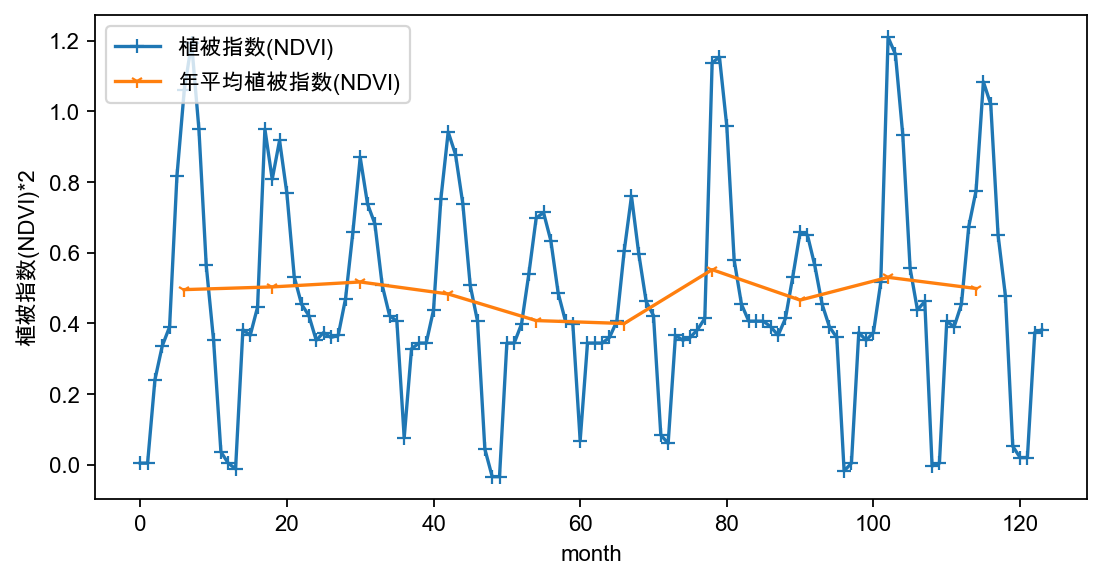

In [562]:
data2 = pd.read_excel(io='第4题.xlsx')
indx = '植被指数(NDVI)'
norn_NDVI = 1/2
NDVI = data2[indx]/norn_NDVI
shift_NDVI = 0
NDVI = NDVI - shift_NDVI
plt.figure(figsize=(8,4),dpi=160)
ave_NDVI = []
for i  in range(t):
    ave_NDVI.append(sum(NDVI[i*12:(i+1)*12])/12)
plt.plot(NDVI,label=indx, linestyle='solid', marker='+')
plt.plot((np.array(range(t))+0.5)*12,ave_NDVI,label='年平均'+indx, linestyle='solid', marker='1')

plt.xlabel('month')
plt.ylabel('植被指数(NDVI)*2')
plt.legend()
plt.savefig('植被指数(NDVI).pdf')

ave_NDVI = np.array(ave_NDVI)

/var/folders/sd/8xsdwm8n70q6psc1047lgnb40000gn/T/ipykernel_60497/1947787138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NG_bio['三小区干重平均值(g)'] = NG_bio['三小区干重平均值(g)']/norm_bio
/var/folders/sd/8xsdwm8n70q6psc1047lgnb40000gn/T/ipykernel_60497/1947787138.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NG_bio['三小区干重平均值(g)'] = NG_bio['三小区干重平均值(g)'] - shift_bio
/var/folders/sd/8xsdwm8n70q6psc1047lgnb40000gn/T/ipykernel_60497/1947787138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a 

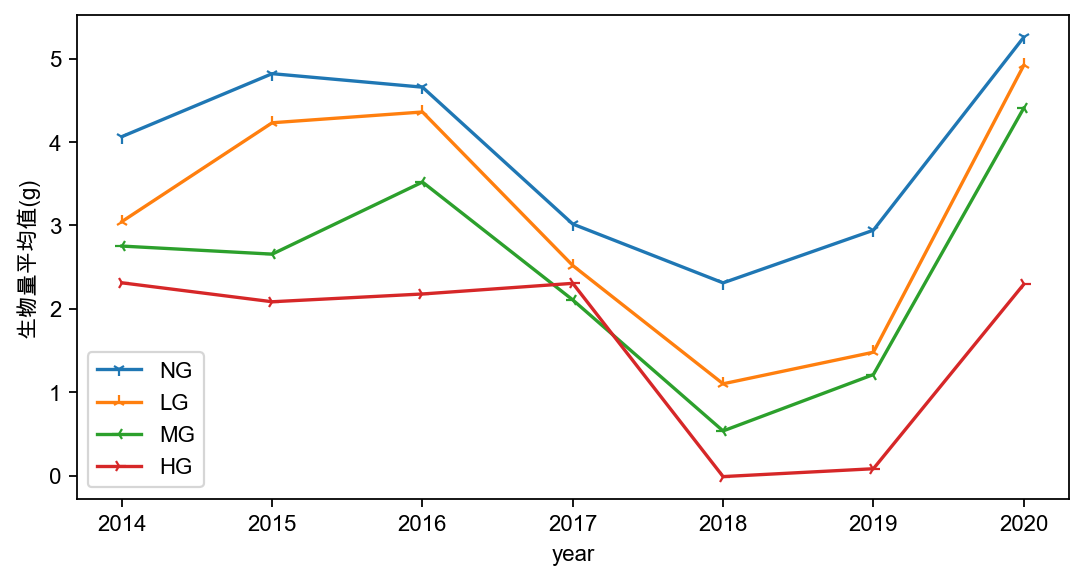

In [473]:
# 生物量
from matplotlib import markers
from pandas import array


#databio = pd.read_csv('./intensity_plant.csv')
databio = pd.read_csv('./bio_data2.csv')

norm_bio = 100
shift_bio = 2
NG_bio = databio[databio['放牧强度']==0]
NG_bio['三小区干重平均值(g)'] = NG_bio['三小区干重平均值(g)']/norm_bio
NG_bio['三小区干重平均值(g)'] = NG_bio['三小区干重平均值(g)'] - shift_bio
LG_bio = databio[databio['放牧强度']==1]
LG_bio['三小区干重平均值(g)'] = LG_bio['三小区干重平均值(g)']/norm_bio - shift_bio
MG_bio = databio[databio['放牧强度']==2]
MG_bio['三小区干重平均值(g)'] = MG_bio['三小区干重平均值(g)']/norm_bio - shift_bio
HG_bio = databio[databio['放牧强度']==3]
HG_bio['三小区干重平均值(g)'] = HG_bio['三小区干重平均值(g)']/norm_bio - shift_bio

plt.figure(figsize=(8,4),dpi=160)
plt.plot(NG_bio['年份'],NG_bio['三小区干重平均值(g)'],label='NG',marker='1')
plt.plot(LG_bio['年份'],LG_bio['三小区干重平均值(g)'],label='LG',marker='2')
plt.plot(MG_bio['年份'],MG_bio['三小区干重平均值(g)'],label='MG',marker='3')
plt.plot(HG_bio['年份'],HG_bio['三小区干重平均值(g)'],label='HG',marker='4')


plt.xlabel('year')
plt.ylabel('生物量平均值(g)')
plt.legend()
plt.savefig('生物量平均值vs放牧强度.pdf')

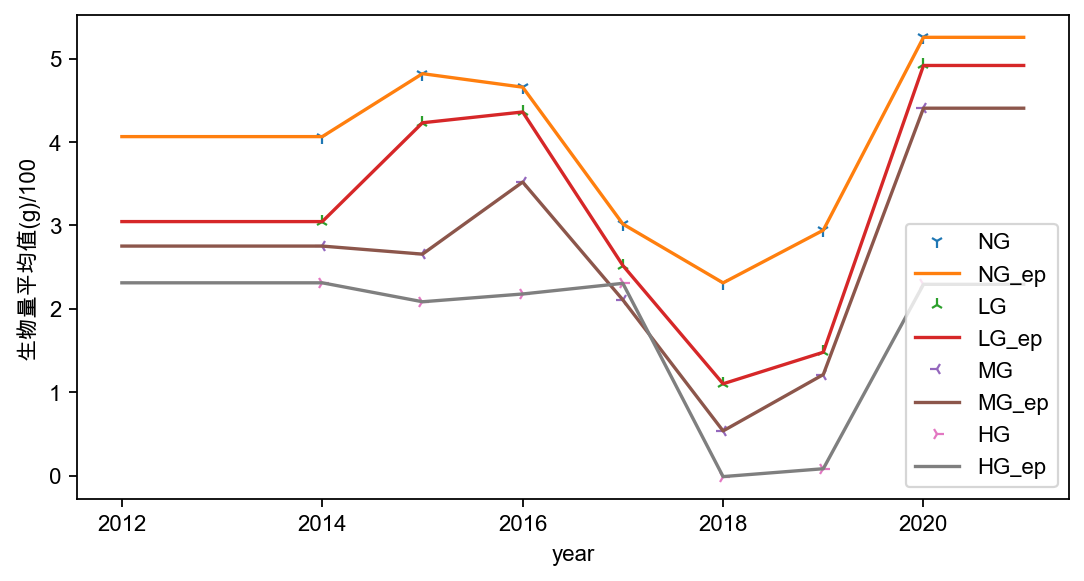

In [560]:
from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
pi = np.pi
def fitint1(x,y):
    def target_func(x, a0, a1,a2, a3, a4):
        return a0 * np.sin(a1 * x) + a3 + a2*(x-2012) + a4/(x+100)

    para, _ = optimize.curve_fit(target_func, x, y)
    xt = (2012,2013,2014,2015,2016,2017,2018,2019,2020,2021)
    y_fit = [target_func(a, *para) for a in xt]
    return xt, y_fit

def fitint2(x,y):
    xt = (2012,2013,2014,2015,2016,2017,2018,2019,2020,2021)
    y2012 = y[0:1] #np.array([500]) 
    y2013 = y[0:1]
    y2021 = y[-1:]
    y_fit = np.concatenate((y2012,y2013,y,y2021),axis=0)
    #y_fit = np.concatenate((y_fit,),axis=0)

    return xt, y_fit

plt.figure(figsize=(8,4),dpi=160)

plt.plot(NG_bio['年份'],NG_bio['三小区干重平均值(g)'],label='NG',linestyle='',marker='1')
xt,yt = fitint2(NG_bio['年份'],NG_bio['三小区干重平均值(g)'])
Ex_bio_NG = yt
plt.plot(xt,yt,label='NG_ep')

plt.plot(LG_bio['年份'],LG_bio['三小区干重平均值(g)'],label='LG',linestyle='',marker='2')
xt,yt = fitint2(LG_bio['年份'],LG_bio['三小区干重平均值(g)'])
Ex_bio_LG = yt
plt.plot(xt,yt,label='LG_ep')

plt.plot(MG_bio['年份'],MG_bio['三小区干重平均值(g)'],label='MG',linestyle='',marker='3')
xt,yt = fitint2(MG_bio['年份'],MG_bio['三小区干重平均值(g)'])
Ex_bio_MG = yt
plt.plot(xt,yt,label='MG_ep')

plt.plot(HG_bio['年份'],HG_bio['三小区干重平均值(g)'],label='HG',linestyle='',marker='4')
xt,yt = fitint2(HG_bio['年份'],HG_bio['三小区干重平均值(g)'])
Ex_bio_HG = yt
plt.plot(xt,yt,label='HG_ep')

plt.xlabel('year')
plt.ylabel('生物量平均值(g)/100')
plt.legend()

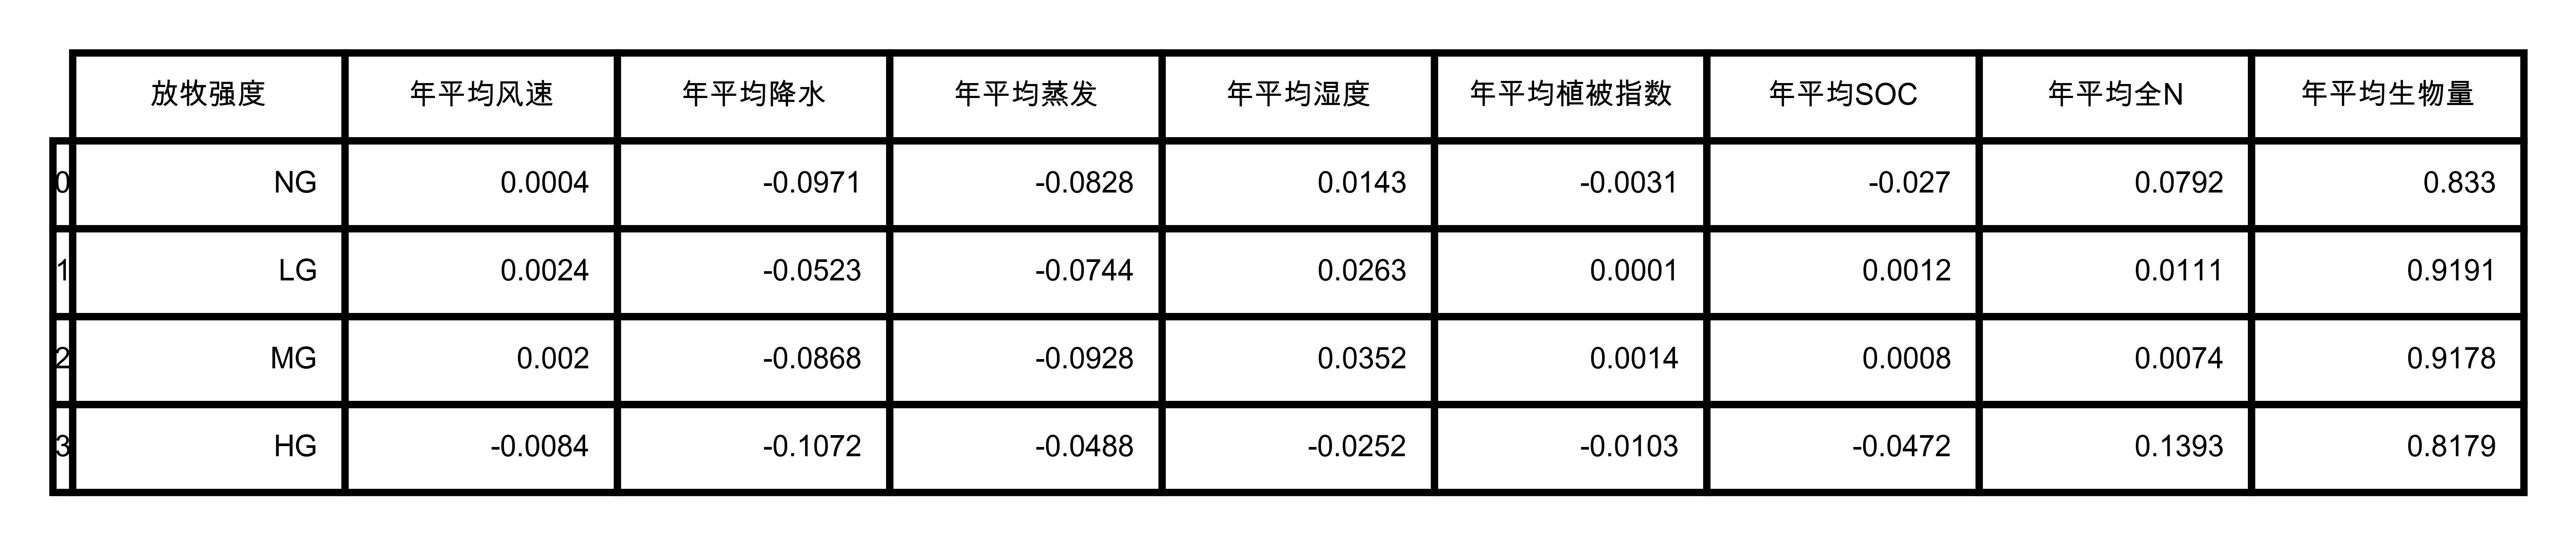

In [475]:
import matplotlib.pyplot as plt
from pyparsing import col                 #加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA           #加载PCA算法包
from pandas.plotting import  table

# 特征矩阵
# 年平均风速 年平均降水 年平均蒸发 年平均湿度 年平均植被指数 年平均有机C 年平均全氮
Matrix_NG = np.column_stack((ave_wind,-ave_rain,ave_evapo,-year_wet,-ave_NDVI,-Int_year_SOC['NG'],Int_year_N['NG'],-Ex_bio_NG))
Matrix_LG = np.column_stack((ave_wind,-ave_rain,ave_evapo,-year_wet,-ave_NDVI,-Int_year_SOC['LG'],Int_year_N['LG'],-Ex_bio_LG))
Matrix_MG = np.column_stack((ave_wind,-ave_rain,ave_evapo,-year_wet,-ave_NDVI,-Int_year_SOC['MG'],Int_year_N['MG'],-Ex_bio_MG))
Matrix_HG = np.column_stack((ave_wind,-ave_rain,ave_evapo,-year_wet,-ave_NDVI,-Int_year_SOC['HG'],Int_year_N['HG'],-Ex_bio_HG))


def Cal_weight(Matrix):
    x=Matrix
    pca = PCA(n_components=4) #降维后主成分数目为2
    newX = pca.fit_transform(x)     #等价于pca.fit(X) pca.transform(X)
    invX = pca.inverse_transform(newX)
    #print(newX)
    #print(invX-x)

    eigenveter = pca.components_
    eigenvalues = pca.explained_variance_
    ratio = pca.explained_variance_ratio_
    weight = np.zeros(8)

    for i in range(len(ratio)):
        weight = weight + ratio[i] * eigenveter[i]
        weight = np.round(weight,4)
    # 求权重
    return weight

weight_NG = Cal_weight(Matrix_NG)
weight_LG = Cal_weight(Matrix_LG)
weight_MG = Cal_weight(Matrix_MG)
weight_HG = Cal_weight(Matrix_HG)
all_weight = [weight_NG,weight_LG,weight_MG,weight_HG]

all_weight = pd.DataFrame(all_weight,columns= ['年平均风速','年平均降水', '年平均蒸发', '年平均湿度', '年平均植被指数', '年平均SOC', '年平均全N','年平均生物量'])
all_weight.insert(0, '放牧强度',['NG','LG','MG','HG'])

fig = plt.figure(figsize=(6, 1), dpi=1200)#dpi表示清晰度
ax = fig.add_subplot(frame_on=False) 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, all_weight, loc='center')  # 将df换成需要保存的dataframe即可
plt.savefig('all_weight.pdf')


## 荒漠化指数
$$
 S = \frac{1}{5} \sum_i{x_i w_i} + 1
$$

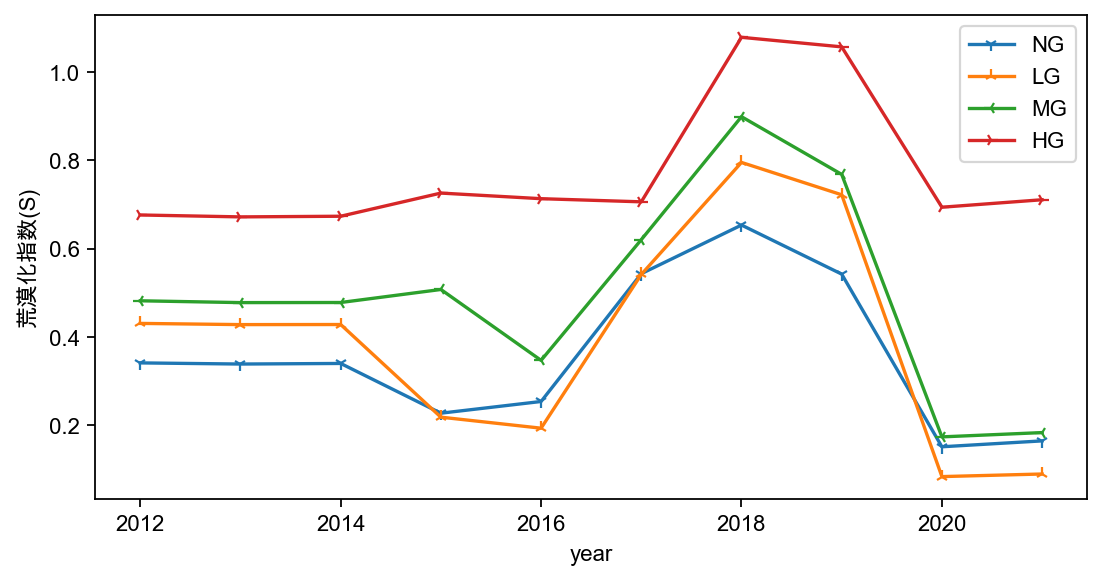

In [480]:
#  10 年的荒漠化指数
def fun_S(vecter,weitht):
    eta = 5
    return np.dot(vecter,weitht)/eta + 1


S_NG =  fun_S(Matrix_NG,weight_NG)
S_LG =  fun_S(Matrix_LG,weight_LG)
S_MG =  fun_S(Matrix_MG,weight_MG)
S_HG =  fun_S(Matrix_HG,weight_HG)

xt = (2012,2013,2014,2015,2016,2017,2018,2019,2020,2021)
plt.figure(figsize=(8,4),dpi=160)
plt.plot(xt,S_NG,label='NG',marker='1')
plt.plot(xt,S_LG,label='LG',marker='2')
plt.plot(xt,S_MG,label='MG',marker='3')
plt.plot(xt,S_HG,label='HG',marker='4')

plt.xlabel('year')
plt.ylabel('荒漠化指数(S)')

plt.legend()
plt.savefig('荒漠化指数(S).pdf')

## 板结程度
$$
B = exp(湿度/50-土壤SOC/10-生物量/100+容重) \\
容重 = 1
$$

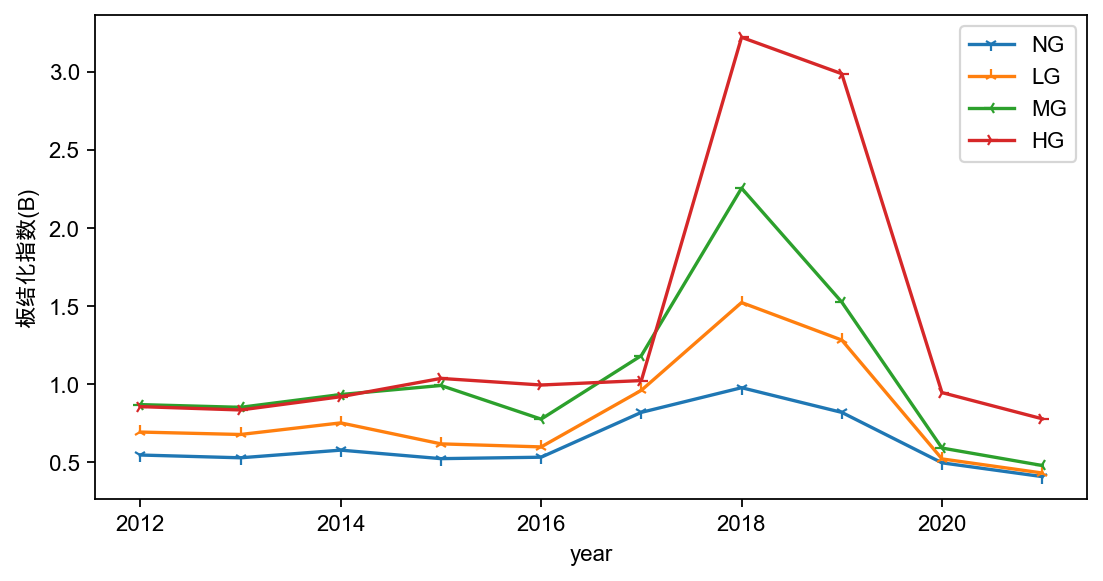

In [561]:
# 板结程度
def fun_B(Matrix,flat=0):
    c = 1
    Matrix = np.abs(Matrix)
    if flat == 0:
        wet = Matrix[: , 3]#年降水影响湿度
    else:
        wet = (Matrix[: , 1]*norn_rain)/2/norn_wet#年降水影响湿度
    SOC,bio,N = Matrix[: , 5],Matrix[: ,-1],Matrix[: ,-2]
    return np.exp(-wet+SOC-np.log(bio+1) + c)


B_NG = fun_B(Matrix_NG)
B_LG = fun_B(Matrix_LG)
B_MG = fun_B(Matrix_MG)
B_HG = fun_B(Matrix_HG)

plt.figure(figsize=(8,4),dpi=160)
plt.plot(xt,B_NG,label='NG',marker='1')
plt.plot(xt,B_LG,label='LG',marker='2')
plt.plot(xt,B_MG,label='MG',marker='3')
plt.plot(xt,B_HG,label='HG',marker='4')
plt.xlabel('year')
plt.ylabel('板结化指数(B)')
plt.legend()
plt.savefig('板结化指数(B).pdf')

# 荒漠化阈值

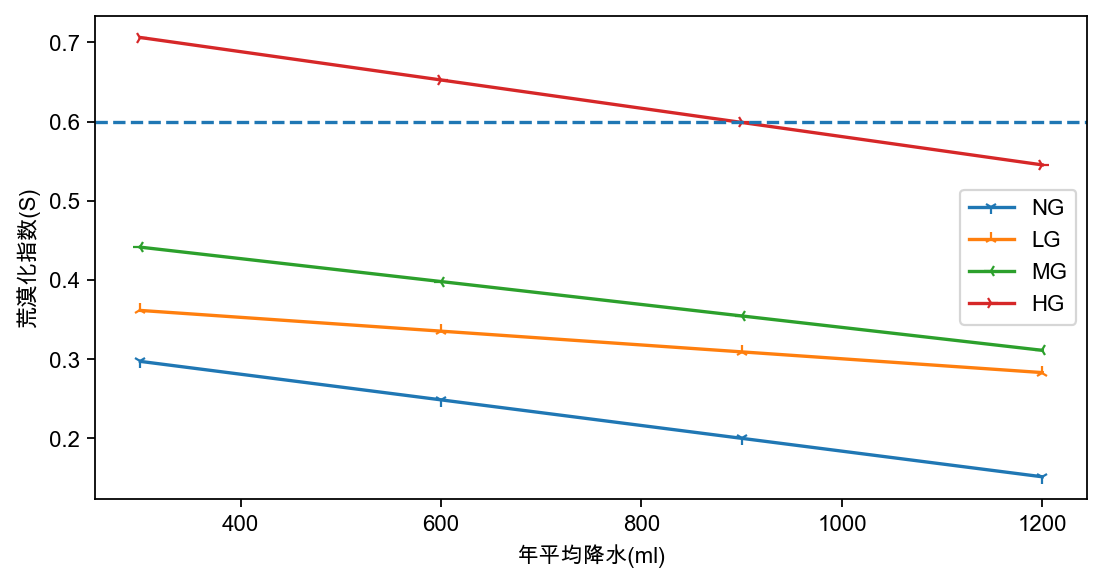

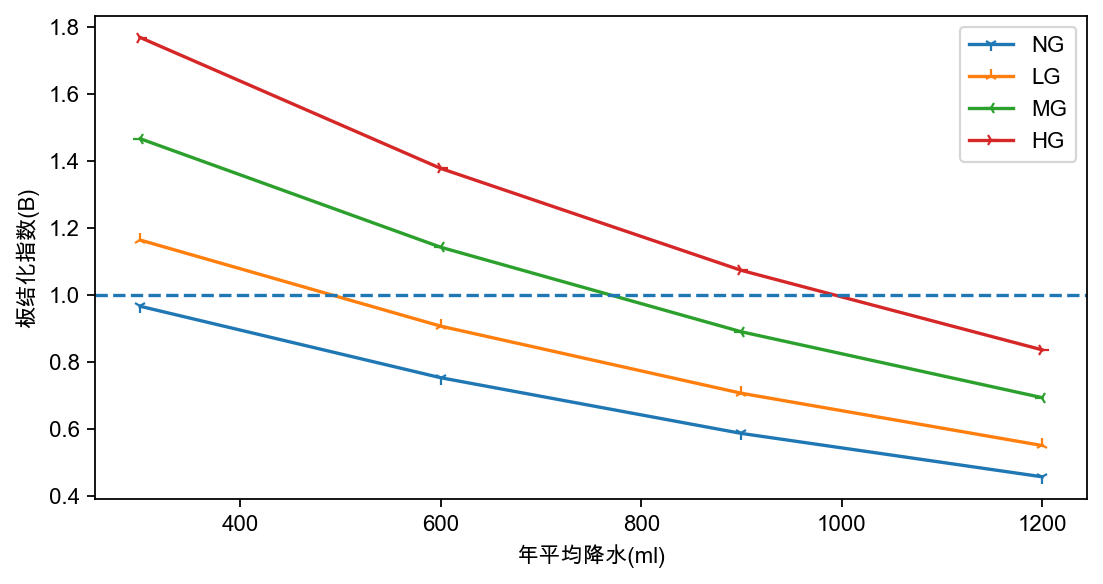

In [548]:


def change_condi(Matrix):
    one =  np.sum(Matrix,axis=0)/len(Matrix)
    one[1] = (300/norn_rain/12-shift_rain)
    one300 = one.copy()
    one[1] = (600/norn_rain/12-shift_rain)
    one600 = one.copy()
    one[1] = (900/norn_rain/12-shift_rain)
    one900 = one.copy()
    one[1] = (1200/norn_rain/12-shift_rain)
    one1200 = one.copy()
    conds = [one300,one600,one900,one1200]

    
    return np.array(conds)


conds_NG = change_condi(Matrix_NG)
conds_LG = change_condi(Matrix_LG)
conds_MG = change_condi(Matrix_MG)
conds_HG = change_condi(Matrix_HG)

SNG = fun_S(conds_NG,weight_NG)
SLG = fun_S(conds_LG,weight_LG)
SMG = fun_S(conds_MG,weight_MG)
SHG = fun_S(conds_HG,weight_HG)

xrain = [300,600,900,1200]
plt.figure(figsize=(8,4),dpi=160)
plt.plot(xrain,SNG,label='NG',marker='1')
plt.plot(xrain,SLG,label='LG',marker='2')
plt.plot(xrain,SMG,label='MG',marker='3')
plt.plot(xrain,SHG,label='HG',marker='4')
plt.axhline(0.6,linestyle='dashed')
plt.xlabel('年平均降水(ml)')
plt.ylabel('荒漠化指数(S)')
plt.legend()
plt.savefig('荒漠化指数(S)阈值.pdf')


BNG = fun_B(conds_NG,flat=1)
BLG = fun_B(conds_LG,flat=1)
BMG = fun_B(conds_MG,flat=1)
BHG = fun_B(conds_HG,flat=1)

plt.figure(figsize=(8,4),dpi=160)
plt.plot(xrain,BNG,label='NG',marker='1')
plt.plot(xrain,BLG,label='LG',marker='2')
plt.plot(xrain,BMG,label='MG',marker='3')
plt.plot(xrain,BHG,label='HG',marker='4')
plt.axhline(1,linestyle='dashed')
plt.xlabel('年平均降水(ml)')
plt.ylabel('板结化指数(B)')
plt.legend()
plt.savefig('板结化指数(B)阈值.pdf')

